# Loading CHESS data

Scattering datasets (HKLI files) from CHESS typically come in one of two forms. The most common (updated) format is the data format used in the `nxrefine` software ([link](https://github.com/nexpy/nxrefine)), and the less common (outdated) format is the data format obtained from the old orientation matrix code used at the beamline prior to ~2023.

## Format 1: Data from nxrefine

The output file structure from nxrefine should look something like the following:
```
experimentname
└── nxrefine
    └── samplename
        └── labelname
            ├── 15
            |    └── transform.nxs
            ├── 100
            |    └── transform.nxs
            ├── 300
            |    └── transform.nxs
            ├── samplename_15.nxs
            ├── samplename_100.nxs
            └── samplename_300.nxs
``` 

The file that we are interested in loading is the .nxs file with the form `samplename_15.nxs`, which holds information about the scan at _T_ = 15 K. This file has a `NXlink` which references an external file with the intensity values, stored in `15/transform.nxs`. In other words, `samplename_15.nxs` contains sample metadata such as the orientation matrix, temperature, ion chamber counts, etc. and the file `transform.nxs` is simply an array-like container for the pixels that make up the oriented HKLI data. 

Usually, we are not interested in the metadata, but if you are interested in accessing the scan metadata, we can use the `nexusformat` package, specifically the `nexusformat.nexus.nxload()` function to open the file. Otherwise, here we provide functions that allow you to directly load the HKLI data without the extra metadata.

TL;DR -- we want to load the file `filename_15.nxs`, not the `transform.nxs` file.

We can accomplish that using the `load_transform()` function in `nxs_analysis_tools` as follows:

In [6]:
from nxs_analysis_tools.datareduction import load_transform
from nxs_analysis_tools.datasets import cubic

# Using the standard nxrefine filepath:
# data = load_transform('experimentname/nxrefine/samplename/labelname/samplename_15.nxs')

# Loading an example dataset
sample_directory = cubic(temperatures=[15]) # Download the example dataset to cache directory
data = load_transform(f'{sample_directory}/cubic_15.nxs')

data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)


Using the `plot_slice()` function, we can now visualize various slices of reciprocal space. Here, we visualize the HK0 plane.

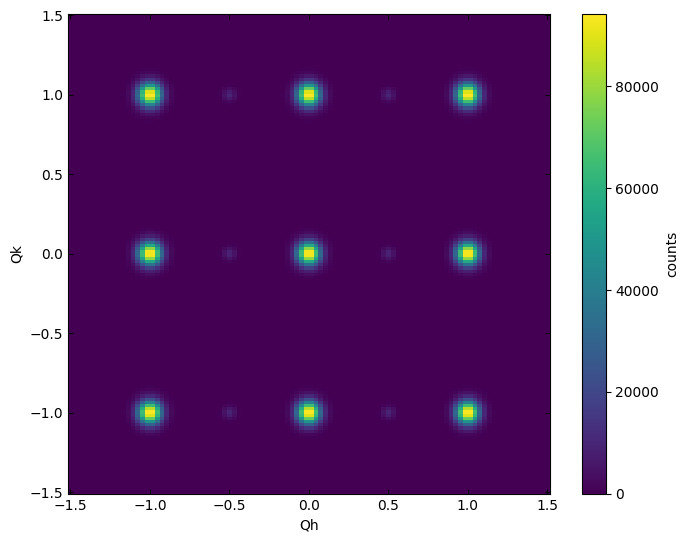

In [7]:
from nxs_analysis_tools.datareduction import plot_slice

plot_slice(data[:,:,0.0])

## Format 2: Legacy data (`3rot_hkli.nxs` files)

The output file structure from the legacy CHESS processing code looks something like:
```
experimentname
└── filename
    └── samplename
        ├── 15
        |   └── 3rot_hkli.nxs
        ├── 100
        |   └── 3rot_hkli.nxs
        └── 300
            └── 3rot_hkli.nxs
``` 

To load this data format, we can use the `load_data()` function as follows:

In [10]:
from nxs_analysis_tools.datareduction import load_data

# Method for loading legacy CHESS data
# data = load_data('example_data/sample_name/15/example_hkli.nxs')

Using the `plot_slice()` function, we can now visualize various slices of reciprocal space. Here, we visualize the HK0 plane.

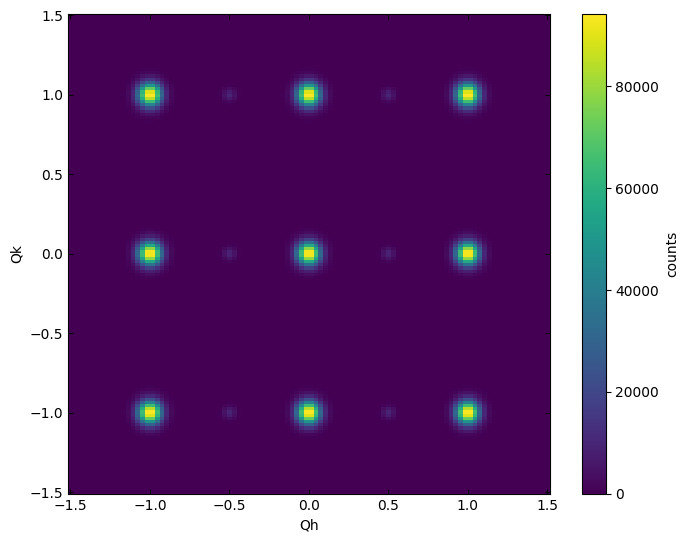

In [9]:
plot_slice(data[:,:,0.0])

For more information about visualizing data, see the example: [Visualizing data using the plot_slice function](https://nxs-analysis-tools.readthedocs.io/en/latest/examples/using_plot_slice.html)

For more information about loading an entire temperature dependence series at once, see the example: [Visualizing CHESS temperature dependent data](https://nxs-analysis-tools.readthedocs.io/en/latest/examples/working_with_chess_data.html)